## Machine learning approaches to the classification problem for autism spectrum disorder

Autistic Spectrum Disorder (ASD) is a neurodevelopment condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.

The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [256]:
# Importing the data
data = pd.read_csv('autism.csv')


In [257]:
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [258]:
data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


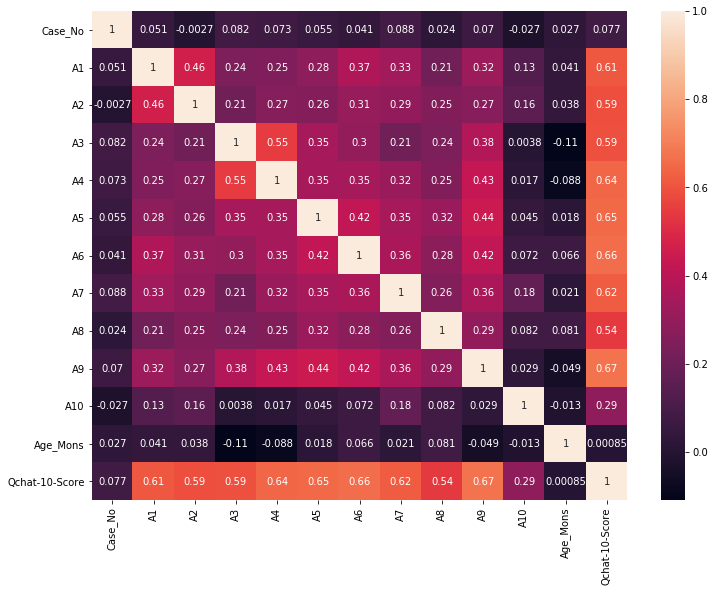

In [259]:
## Checking correlation between the features
plt.figure(figsize=(12, 9))
corr = data.corr()
sns.heatmap(corr,annot = True)

In [260]:
data = data.drop(['Case_No','Who completed the test'],axis = 1)

In [261]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,Yes


In [262]:
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [263]:
print(data.dtypes)
total = len(data.index)
positive = len(data[data['Class/ASD Traits ']=="Yes"])
negative = len(data[data['Class/ASD Traits ']=="No"])

print ("Total number of records: {}".format(total))
print( "Total number of positive autism cases:{}".format(positive))
print( "Total number of negative autism cases:{}".format(negative))

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object
Total number of records: 1054
Total number of positive autism cases:728
Total number of negative autism cases:326


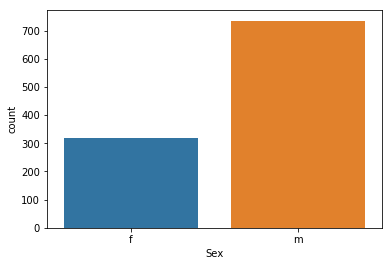

In [264]:
# Checking some distributions

sns.countplot(x='Sex',data=data)

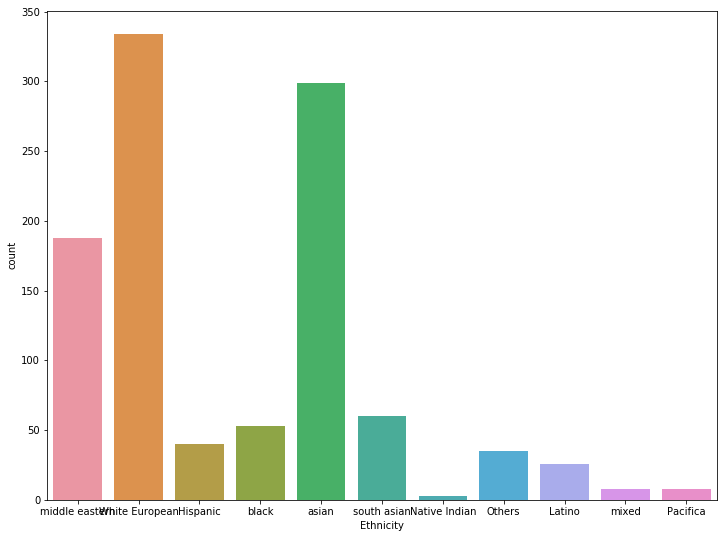

In [265]:
plt.figure(figsize=(12,9))
sns.countplot(x='Ethnicity',data=data)

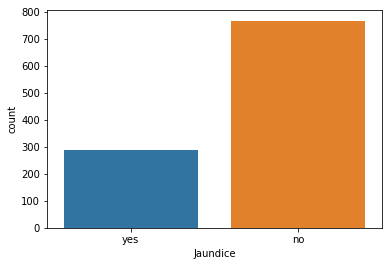

In [266]:
sns.countplot(x='Jaundice',data=data)

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,0.666667,0.3,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,1.000000,0.4,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,1.000000,0.4,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,0.500000,1.0,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,0.333333,0.9,f,White European,no,yes,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
A1                     1054 non-null int64
A2                     1054 non-null int64
A3                     1054 non-null int64
A4                     1054 non-null int64
A5                     1054 non-null int64
A6                     1054 non-null int64
A7                     1054 non-null int64
A8                     1054 non-null int64
A9                     1054 non-null int64
A10                    1054 non-null int64
Age_Mons               1054 non-null float64
Qchat-10-Score         1054 non-null float64
Sex                    1054 non-null object
Ethnicity              1054 non-null object
Jaundice               1054 non-null object
Family_mem_with_ASD    1054 non-null object
Class/ASD Traits       1054 non-null int64
dtypes: float64(2), int64(11), object(4)
memory usage: 140.1+ KB


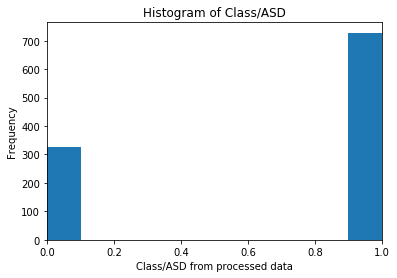

In [267]:
# Normalizing the continuous variables 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['Qchat-10-Score', 'Age_Mons']

features_minmax_transform = pd.DataFrame(data = data)
features_minmax_transform[numerical] = scaler.fit_transform(data[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

## Convert target labels. Yes = 1 && No = 0
data['Class/ASD Traits ']= data['Class/ASD Traits '].apply(lambda x: 1 if x == 'Yes' else 0)
plt.hist(data['Class/ASD Traits '],bins=10)
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')
data.info()

In [268]:
#Converting categorical features to dummy variables
data= pd.get_dummies(data, columns=['Sex','Ethnicity','Jaundice','Family_mem_with_ASD',] )
data.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_no,Jaundice_yes,Family_mem_with_ASD_no,Family_mem_with_ASD_yes
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,1,1,0
1,1,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
4,1,1,0,1,1,1,1,1,1,1,...,1,0,0,0,0,0,1,0,0,1


In [269]:
print(data.columns)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Class/ASD Traits ', 'Sex_f', 'Sex_m',
       'Ethnicity_Hispanic', 'Ethnicity_Latino', 'Ethnicity_Native Indian',
       'Ethnicity_Others', 'Ethnicity_Pacifica', 'Ethnicity_White European',
       'Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian', 'Jaundice_no',
       'Jaundice_yes', 'Family_mem_with_ASD_no', 'Family_mem_with_ASD_yes'],
      dtype='object')


In [270]:
X = data.drop(['Class/ASD Traits '],1)
y = data['Class/ASD Traits ']

In [271]:
#Spliting the dataset for modelling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [272]:
# Train the model on Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=10)
dtree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(dtree.score(X_train,y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


## Decision Tree

In [273]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
pred = dtree.predict(X_test)
print (accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00       141

   micro avg       1.00      1.00      1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

[[ 70   0]
 [  0 141]]


## Random Forest

In [274]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, random_state=1)
rf.fit(X_train,y_train)
print("Train Score : {}".format(rf.score(X_train,y_train)))
print("Test Score : {}".format(rf.score(X_test,y_test)))



# K cross validation
from sklearn.model_selection import cross_val_score 
cv_scores = cross_val_score(rf, X, y, cv=10)

cv_scores.mean()


Train Score : 1.0
Test Score : 1.0


0.9971516690856314

In [275]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
pred = rf.predict(X_test)
print (accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

#Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00       141

   micro avg       1.00      1.00      1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

[[ 70   0]
 [  0 141]]


## KNN Classifier

In [276]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 5)
knn.fit(X_train, y_train)
print("Train Score : {}".format(knn.score(X_train,y_train)))
print("Test Score : {}".format(knn.score(X_test,y_test)))

knn_cvscore =  cross_val_score(knn, X, y, cv=10)
knn_cvscore.mean()

pred = knn.predict(X_test)
print (accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

#Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)



Train Score : 0.9644128113879004
Test Score : 0.95260663507109
0.95260663507109
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        70
           1       0.97      0.96      0.96       141

   micro avg       0.95      0.95      0.95       211
   macro avg       0.94      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211

[[ 66   4]
 [  6 135]]


## Logistic Regression

In [277]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

print("Train Score : {}".format(lreg.score(X_train,y_train)))
print("Test Score : {}".format(lreg.score(X_test,y_test)))

lreg_cvscore =  cross_val_score(lreg, X, y, cv=10)
lreg_cvscore.mean()

pred = lreg.predict(X_test)
print (accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

#Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)



Train Score : 0.9988137603795967
Test Score : 0.995260663507109
0.995260663507109
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        70
           1       0.99      1.00      1.00       141

   micro avg       1.00      1.00      1.00       211
   macro avg       1.00      0.99      0.99       211
weighted avg       1.00      1.00      1.00       211

[[ 69   1]
 [  0 141]]


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

## Feature Importance
An important task when performing supervised learning on a dataset like the autistic data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual has ASD or not.

Choose a scikit-learn classifier (e.g., gradientBoosting, adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the ASD dataset.

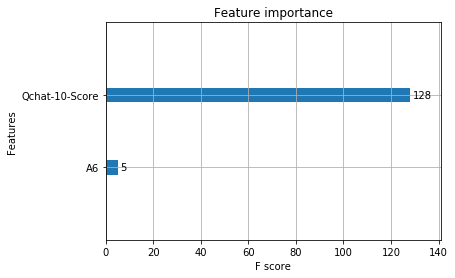

In [278]:
# Importing supervised learning model with feature importance (XGBoost)

from xgboost import XGBClassifier
XGB = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
XGB.fit(X_train, y_train)

from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(XGB)
plt.show()

## Building a Multi Layer Perceptron Model
In this last part I build a model here using sequential model architecture best known as Multi Layer Perceptron (MLP).

In [279]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


In [280]:
# Building the model architecture with one layer of length 4


model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 29))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8)                 240       
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [281]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [283]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_test, y_test), 
          verbose=2)

Train on 843 samples, validate on 211 samples
Epoch 1/100
 - 0s - loss: 0.0119 - acc: 0.9953 - val_loss: 0.0123 - val_acc: 0.9953
Epoch 2/100
 - 0s - loss: 0.0080 - acc: 0.9988 - val_loss: 0.0116 - val_acc: 0.9953
Epoch 3/100
 - 0s - loss: 0.0075 - acc: 0.9988 - val_loss: 0.0116 - val_acc: 0.9953
Epoch 4/100
 - 0s - loss: 0.0059 - acc: 0.9988 - val_loss: 0.0098 - val_acc: 0.9953
Epoch 5/100
 - 0s - loss: 0.0094 - acc: 0.9976 - val_loss: 0.0102 - val_acc: 0.9953
Epoch 6/100
 - 0s - loss: 0.0063 - acc: 0.9988 - val_loss: 0.0090 - val_acc: 0.9953
Epoch 7/100
 - 0s - loss: 0.0069 - acc: 0.9976 - val_loss: 0.0105 - val_acc: 0.9953
Epoch 8/100
 - 0s - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0104 - val_acc: 0.9953
Epoch 9/100
 - 0s - loss: 0.0089 - acc: 0.9976 - val_loss: 0.0097 - val_acc: 0.9953
Epoch 10/100
 - 0s - loss: 0.0072 - acc: 0.9988 - val_loss: 0.0093 - val_acc: 0.9953
Epoch 11/100
 - 0s - loss: 0.0079 - acc: 0.9976 - val_loss: 0.0104 - val_acc: 0.9953
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0078 - val_acc: 0.9953
Epoch 98/100
 - 0s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0090 - val_acc: 0.9953
Epoch 99/100
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0088 - val_acc: 0.9953
Epoch 100/100
 - 0s - loss: 0.0015 - acc: 0.9988 - val_loss: 0.0088 - val_acc: 0.9953


In [286]:

# Evaluating the model on the training and testing set
score_train = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score_train)

score_test = model.evaluate(X_test, y_test, verbose=0)
print("\n Testing accuracy: ", score_test)

843/843 [==============================] - 0s 22us/step

 Training Accuracy: [3.518378543964602e-05, 1.0]

 Testing accuracy:  [0.007045398665188207, 0.995260663507109]
